# House Price Prediction

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Matplotlib is building the font cache; this may take a moment.


In [2]:
#importing training data set
train=os.path.join(r"C:\Users\anith\Desktop\project-ELECTRICITY CONSUMPTION\Dataset\Household energy bill data.csv")

In [3]:
train=pd.read_csv(train)

In [4]:
train

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625
...,...,...,...,...,...,...,...,...,...,...
995,3,0,991.31,0,1,0,12687.26,1,1,655.870111
996,2,5,847.97,0,1,0,39502.92,0,0,354.472693
997,2,4,660.94,1,0,0,10145.17,0,1,568.660550
998,1,1,814.75,0,1,1,15535.05,0,1,653.423314


In [5]:
train.shape

(1000, 10)

In [6]:
train.columns

Index(['num_rooms', 'num_people', 'housearea', 'is_ac', 'is_tv', 'is_flat',
       'ave_monthly_income', 'num_children', 'is_urban', 'amount_paid'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_rooms           1000 non-null   int64  
 1   num_people          1000 non-null   int64  
 2   housearea           1000 non-null   float64
 3   is_ac               1000 non-null   int64  
 4   is_tv               1000 non-null   int64  
 5   is_flat             1000 non-null   int64  
 6   ave_monthly_income  1000 non-null   float64
 7   num_children        1000 non-null   int64  
 8   is_urban            1000 non-null   int64  
 9   amount_paid         1000 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 78.2 KB


In [8]:
train.describe()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.962000,4.897000,794.703420,0.376000,0.798000,0.477000,24684.986550,1.078000,0.608000,600.396359
std,1.030348,2.007591,147.771736,0.484622,0.401693,0.499721,9678.228224,0.934232,0.488441,181.406210
min,-1.000000,-1.000000,244.400000,0.000000,0.000000,0.000000,-1576.440000,0.000000,0.000000,87.851850
25%,1.000000,4.000000,691.037500,0.000000,1.000000,0.000000,18036.762500,0.000000,0.000000,475.065141
50%,2.000000,5.000000,789.970000,0.000000,1.000000,0.000000,24742.575000,1.000000,1.000000,598.331726
75%,3.000000,6.000000,892.955000,1.000000,1.000000,1.000000,31402.357500,2.000000,1.000000,729.930489
max,5.000000,11.000000,1189.120000,1.000000,1.000000,1.000000,56531.080000,4.000000,1.000000,1102.994109


In [9]:
train.corr()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
num_rooms,1.000000,-0.005765,-0.033561,0.018620,-0.016146,0.004133,-0.000345,-0.037474,-0.015705,-0.023933
num_people,-0.005765,1.000000,0.000072,0.033672,0.020101,0.012104,0.019152,-0.010656,-0.023863,0.053501
housearea,-0.033561,0.000072,1.000000,0.036039,0.088323,0.007986,-0.042645,0.038699,0.024902,0.096157
is_ac,0.018620,0.033672,0.036039,1.000000,-0.000247,0.002678,-0.014054,-0.027256,-0.053317,0.390003
is_tv,-0.016146,0.020101,0.088323,-0.000247,1.000000,-0.028155,0.013664,0.015353,0.034774,0.197613
is_flat,0.004133,0.012104,0.007986,0.002678,-0.028155,1.000000,-0.014879,-0.028315,-0.000066,0.147927
ave_monthly_income,-0.000345,0.019152,-0.042645,-0.014054,0.013664,-0.014879,1.000000,0.008329,-0.039424,0.025889
num_children,-0.037474,-0.010656,0.038699,-0.027256,0.015353,-0.028315,0.008329,1.000000,-0.007511,0.447512
is_urban,-0.015705,-0.023863,0.024902,-0.053317,0.034774,-0.000066,-0.039424,-0.007511,1.000000,0.649568
amount_paid,-0.023933,0.053501,0.096157,0.390003,0.197613,0.147927,0.025889,0.447512,0.649568,1.000000


In [10]:
train.isnull().sum()

num_rooms             0
num_people            0
housearea             0
is_ac                 0
is_tv                 0
is_flat               0
ave_monthly_income    0
num_children          0
is_urban              0
amount_paid           0
dtype: int64

In [11]:
# missing values from train dataset
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(30)

,Total,Percent
num_rooms,0,0.0
num_people,0,0.0
housearea,0,0.0
is_ac,0,0.0
is_tv,0,0.0
is_flat,0,0.0
ave_monthly_income,0,0.0
num_children,0,0.0
is_urban,0,0.0
amount_paid,0,0.0


# Dealing with train data



# Graphical visualizations

C:\Users\anith\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


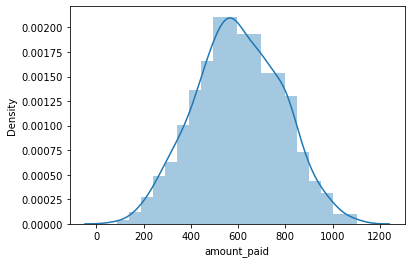

In [12]:
#histogram
import seaborn as sns
sns.distplot(train['amount_paid']);

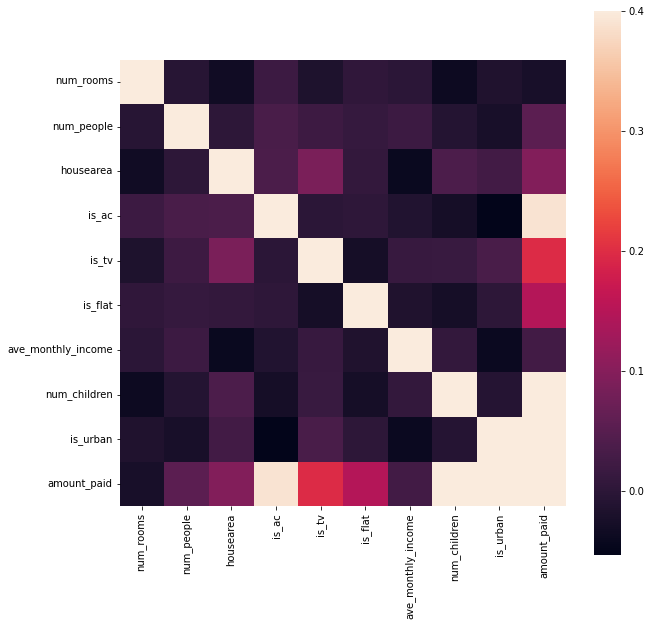

In [13]:
# correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,vmax=.4,square = True);

array([[<AxesSubplot:title={'center':'num_rooms'}>,
        <AxesSubplot:title={'center':'num_people'}>,
        <AxesSubplot:title={'center':'housearea'}>],
       [<AxesSubplot:title={'center':'is_ac'}>,
        <AxesSubplot:title={'center':'is_tv'}>,
        <AxesSubplot:title={'center':'is_flat'}>],
       [<AxesSubplot:title={'center':'ave_monthly_income'}>,
        <AxesSubplot:title={'center':'num_children'}>,
        <AxesSubplot:title={'center':'is_urban'}>],
       [<AxesSubplot:title={'center':'amount_paid'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

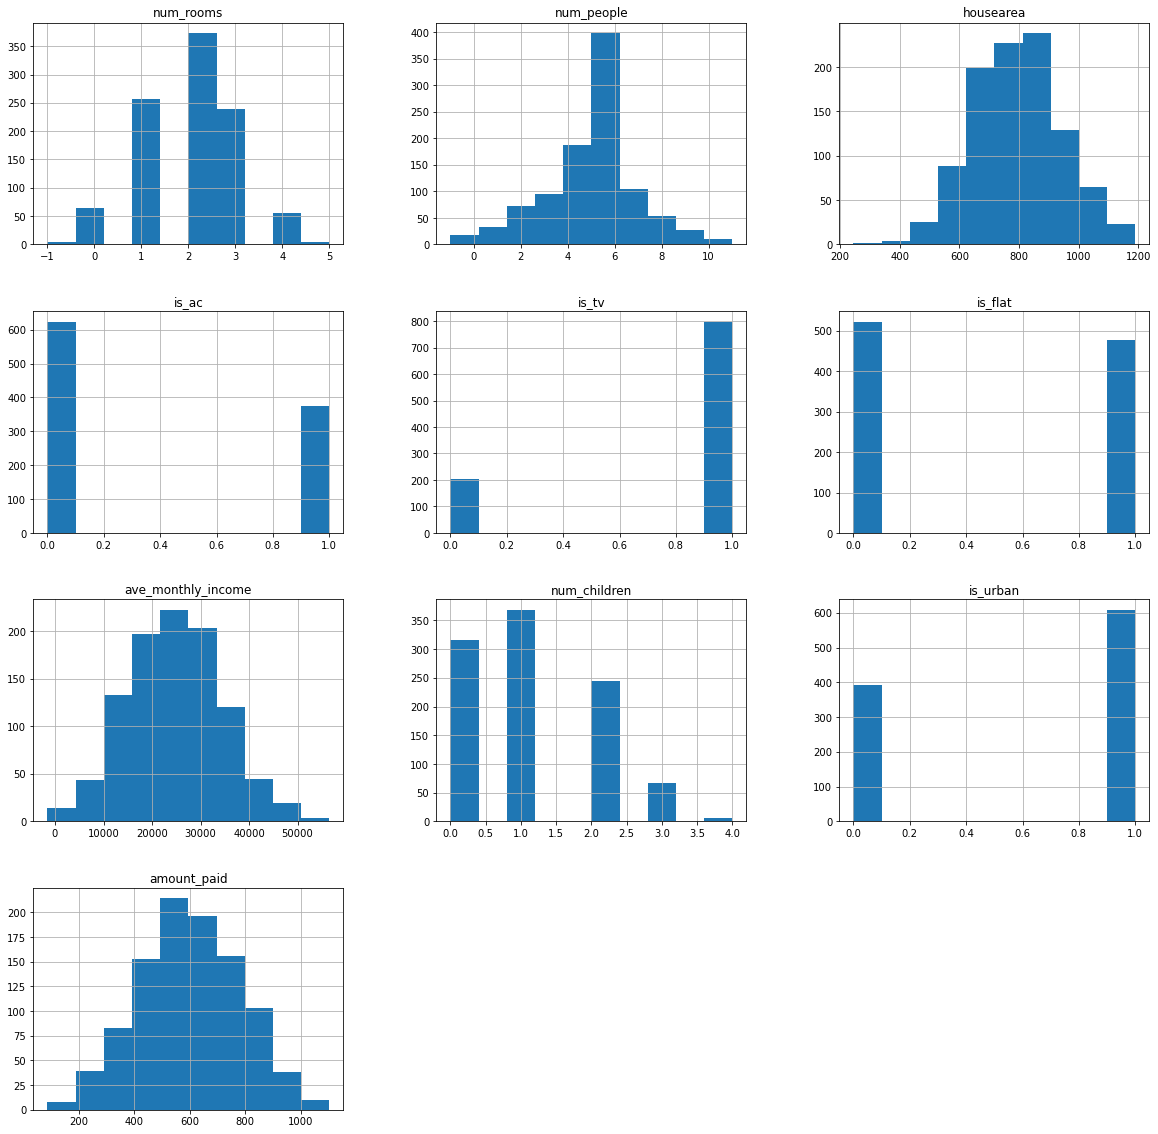

In [14]:
train.hist(figsize=(20,20))

In [15]:
train.head()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625


In [16]:
train.columns

Index(['num_rooms', 'num_people', 'housearea', 'is_ac', 'is_tv', 'is_flat',
       'ave_monthly_income', 'num_children', 'is_urban', 'amount_paid'],
      dtype='object')

C:\Users\anith\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


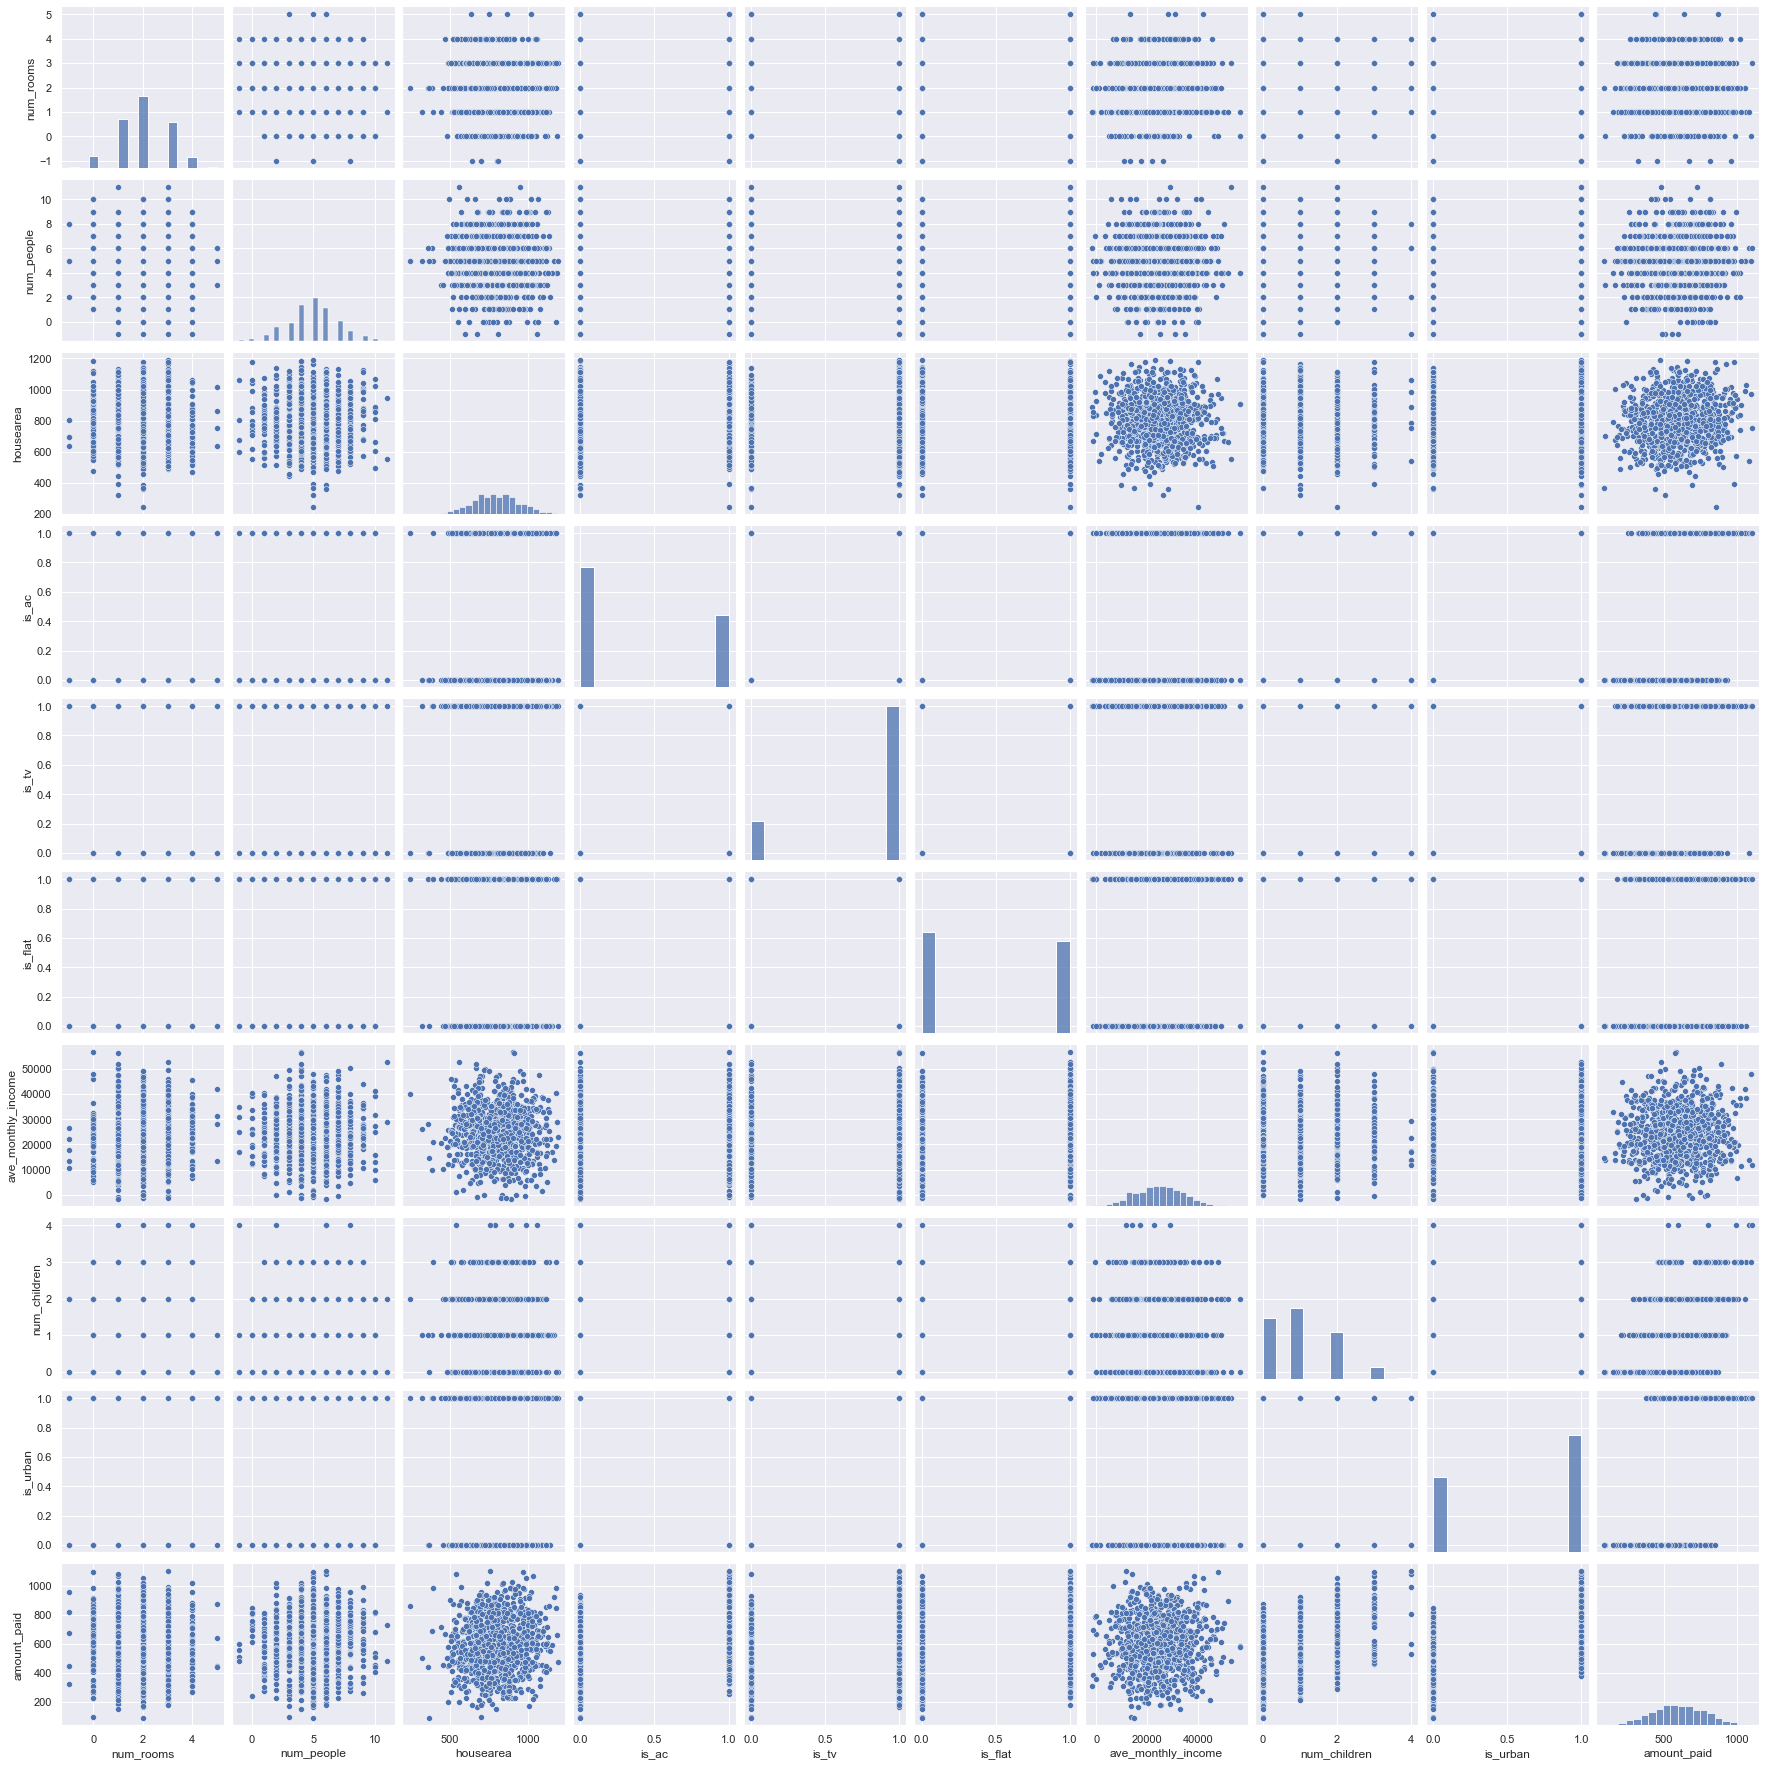

In [17]:
import seaborn as sns
sns.set()
cols = ['num_rooms', 'num_people', 'housearea', 'is_ac', 'is_tv', 'is_flat','ave_monthly_income', 'num_children', 'is_urban', 'amount_paid']
sns.pairplot(train[cols], size = 2.5)
plt.show()

In [18]:
train.columns

Index(['num_rooms', 'num_people', 'housearea', 'is_ac', 'is_tv', 'is_flat',
       'ave_monthly_income', 'num_children', 'is_urban', 'amount_paid'],
      dtype='object')

In [19]:
train.drop(['ave_monthly_income'], axis = 1)

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,2,0,560.481447
1,1,5,952.99,0,1,0,1,1,633.283679
2,3,1,761.44,1,1,1,0,0,511.879157
3,0,5,861.32,1,1,0,0,0,332.992035
4,1,8,731.61,0,1,0,2,1,658.285625
...,...,...,...,...,...,...,...,...,...
995,3,0,991.31,0,1,0,1,1,655.870111
996,2,5,847.97,0,1,0,0,0,354.472693
997,2,4,660.94,1,0,0,0,1,568.660550
998,1,1,814.75,0,1,1,0,1,653.423314


In [20]:
train1=train

In [21]:
X_train=train1.drop(['amount_paid'],axis=1)
y_train=train1['amount_paid']


In [22]:
X_train.shape

(1000, 9)

In [23]:
y_train.shape

(1000,)

In [24]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 9)
(200, 9)
(800,)
(200,)


# Decision tree

In [25]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [26]:
r2_score = regressor.score(X_test,y_test)
print(r2_score*100,'%')

75.46163594745407 %


In [27]:
#Predicting the Test set results
import pickle
y_pred_dt = regressor.predict(X_test)

In [28]:
#Evaluating the model

from sklearn import metrics
r2_score_dt=metrics.r2_score(y_test,y_pred_dt)
MAE_dt=metrics.mean_absolute_error(y_test,y_pred_dt)
MSE_dt=metrics.mean_squared_error(y_test,y_pred_dt)
RMSE_dt=np.sqrt(MSE_dt)

metrics_dt=pd.DataFrame([f"{r2_score_dt:8f}", f"{MAE_dt:8f}",f"{MSE_dt:8f}",RMSE_dt],
                            index=['r2 score(%)', 'MAE', 'MSE', 'RMSE'], columns=['Metrics Of decision tree Regression'])
metrics_dt

,Metrics Of decision tree Regression
r2 score(%),0.754616
MAE,75.324663
MSE,8800.270320
RMSE,93.809756


In [29]:
DT_compare = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_dt})
DT_compare.head(10)

,Real Values,Predicted Values
742,742.379815,700.218749
704,541.108098,555.326944
295,432.334036,332.559418
945,816.323799,636.884429
207,606.394156,748.344250
410,618.010131,565.487422
877,299.992237,228.951350
311,793.735424,641.320910
466,294.090454,393.622530
457,686.892950,650.915302


# Random forest

In [30]:
import pickle
from sklearn.ensemble import RandomForestRegressor
regression_forest = RandomForestRegressor(n_estimators=50,random_state=43)
regression_forest.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=43)

In [31]:
r2_score = regression_forest.score(X_test,y_test)
print(r2_score*100,'%')

83.35089329631097 %


In [32]:
#Predicting the Test set results
y_pred_forest = regression_forest.predict(X_test)
y_pred_forest.shape

(200,)

In [33]:
y_pred_forest

array([ 745.05651924,  573.40608015,  323.91055489,  717.72728235,
        733.61954147,  562.57021883,  316.50576354,  661.12619762,
        357.54607955,  574.11259529,  399.08760542,  877.09251799,
        587.28289416,  912.51822094,  635.45542918,  492.365626  ,
        344.80591315,  562.36195247,  652.50174004,  309.18012616,
        776.50397563,  555.77609232,  524.07128281,  530.21353253,
        541.17253443,  754.85788651,  645.96186042,  478.01831226,
        521.32680012,  703.96314153,  780.61727304,  225.60696261,
        361.73713926,  872.76011463,  563.09132152,  810.86277923,
        246.24792897,  798.67121619,  677.48328485,  864.00570986,
        524.08730927,  569.35656652,  519.86500241,  850.19623726,
        578.21866277,  347.73931853,  789.24647868,  660.69635965,
        711.23720098,  544.97667223,  961.05230017,  770.48927223,
        482.1329683 ,  721.86023413,  618.83804467,  500.19233748,
        473.74899842,  652.11687183,  674.80661356,  523.75784

In [34]:
y_test

742    742.379815
704    541.108098
295    432.334036
945    816.323799
207    606.394156
          ...    
152    812.121215
705    779.886663
584    359.948497
205    570.843263
160    455.347605
Name: amount_paid, Length: 200, dtype: float64

In [35]:
#Evaluating the model

from sklearn import metrics
r2_score_forest=metrics.r2_score(y_test,y_pred_forest)
MAE_forest=metrics.mean_absolute_error(y_test,y_pred_forest)
MSE_forest=metrics.mean_squared_error(y_test,y_pred_forest)
RMSE_forest=np.sqrt(MSE_forest)

metrics_forest=pd.DataFrame([f"{r2_score_forest:8f}", f"{MAE_forest:8f}",f"{MSE_forest:8f}",RMSE_forest],
                            index=['r2 score(%)', 'MAE', 'MSE', 'RMSE'], columns=['Metrics Of Random forest Regression'])
metrics_forest

,Metrics Of Random forest Regression
r2 score(%),0.833509
MAE,63.552269
MSE,5970.921259
RMSE,77.271736


In [36]:
rf_compare = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_forest})
rf_compare.head(10)

,Real Values,Predicted Values
742,742.379815,745.056519
704,541.108098,573.406080
295,432.334036,323.910555
945,816.323799,717.727282
207,606.394156,733.619541
410,618.010131,562.570219
877,299.992237,316.505764
311,793.735424,661.126198
466,294.090454,357.546080
457,686.892950,574.112595
